In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [171]:
# Parametersfor the benchmarking
fps=295
num_particles=1000
dt=1/fps
spatial_resolution=30E-06  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=10000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution

0.0006926383579377664


Generating initial x coordinates

In [172]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_trunc= sample_x_in_resol.astype(int)
# print(sample_x_trunc[:10])
sample_x_trunc_SI=sample_x_trunc*spatial_resolution
# print(sample_x_trunc_SI)
# print(sample_x_SI)

In [173]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

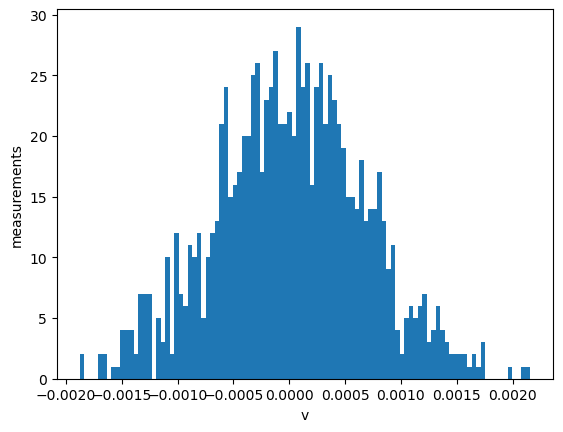

In [174]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Text(0, 0.5, 'measurements')

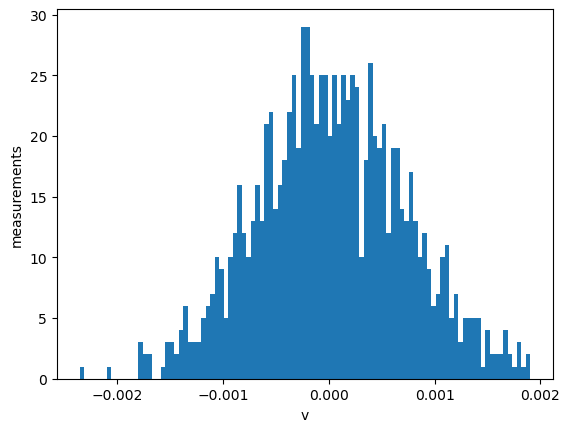

In [175]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

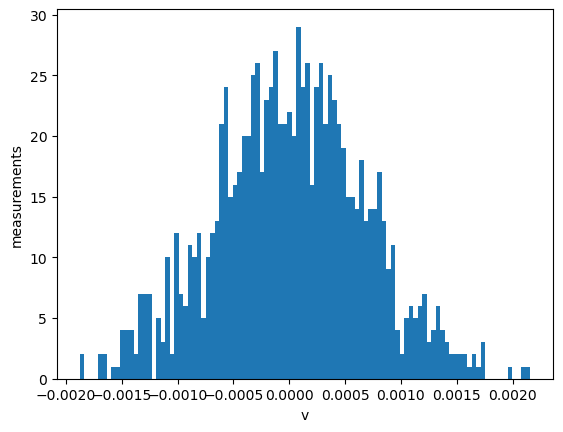

In [176]:
# Simulating the motion of the particles
x_forward=sample_x+sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
x_forward_trunc=x_forward_in_resol.astype(int)
# print(x_forward_trunc)
x_forward_SI=x_forward_trunc*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

In [177]:
# Calculating restored velocities
v_restored=(x_forward_SI- sample_x)/dt
# print(v_restored)

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

0.004401890388280681
49.30651862323821
4930.651862323822


Code to make the y coordinates

In [178]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_y = sts.uniform(left_SI, right_SI-left_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
# print(sample_x_trunc)
sample_y_trunc= sample_y_in_resol.astype(int)
# print(sample_x_trunc)
sample_y_trunc_SI=sample_y_trunc*spatial_resolution
# print(sample_y_trunc_SI
    #   )
# print(sample_x_SI)

Text(0, 0.5, 'measurements')

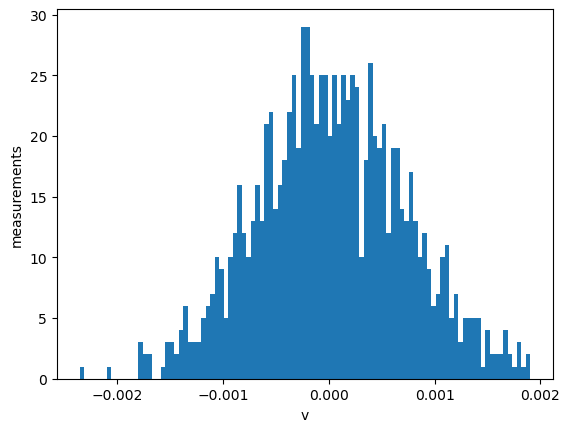

In [179]:
# Simulating the motion of the particles
y_forward=sample_y+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_trunc=y_forward_in_resol.astype(int)
# print(x_forward_trunc)
x_forward_SI=x_forward_trunc*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates

In [186]:
def make_coord_df(init_frame,final_frame, num_particles, init_x_trunc_SI, init_y_trunc_SI, sample_vx,sample_vy, dt,spatial_resolution):
    frame_data = []
    while init_frame <= final_frame:

        # Simulating the motion of the particles for x coordinates
        x_forward = init_x_trunc_SI + sample_vx * dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype(int)
        x_forward_SI = x_forward_trunc * spatial_resolution

        # Simulating the motion of the particles for y coordinates
        y_forward = init_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype(int)
        y_forward_SI= y_forward_trunc * spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- init_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- init_y_trunc_SI)/dt

        for j in range(num_particles):
            # Append the data for the current frame
            frame_data.append([init_x_trunc_SI[j], init_y_trunc_SI[j], j,sample_vx[j],sample_vy[j],v_restored_x[j],v_restored_y[j],init_frame])
        
        # Update the initial positions for the next frame
        init_x_trunc_SI = x_forward_SI
        init_y_trunc_SI = y_forward_SI
        init_frame += 1
    # Create a DataFrame
    x_y_df = pd.DataFrame(frame_data, columns=['x', 'y', 'part_no', 'vx (unrestored)','vy (unrestored)','vx(restored)','vy(restored)','frame'])
    return x_y_df


In [188]:
coord_df=make_coord_df(0,2, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, dt,spatial_resolution)
coord_df.head()

,x,y,part_no,vx (unrestored),vy (unrestored),vx(restored),vy(restored),frame
0,0.01125,0.02931,0,0.001226,-0.000062,0.00000,-0.00885,0
1,0.02688,0.04401,1,-0.001477,-0.000097,-0.00885,-0.00885,0
2,0.03168,0.03279,2,-0.001237,0.000303,-0.00885,0.00000,0
3,0.01389,0.04770,3,0.000580,0.000685,0.00000,0.00000,0
4,0.01560,0.04623,4,-0.000230,-0.000027,-0.00885,-0.00885,0


Function to get the discrepancies

In [182]:
def get_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [183]:
get_discrepancies(v_restored,sample_vx)

4930.651862323822

Function to create the database of velocities

In [ ]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px):
    init_frame=1
    final_frame=2 #using it as 2 now will parametrise it when making a general function
    dt=1/fps
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
    unif_x = sts.uniform(left_SI, right_SI-left_SI)
    sample_x=unif_x.rvs(num_particles)
    sample_x_in_resol= sample_x/spatial_resolution
    sample_x_trunc= sample_x_in_resol.astype(int)
    sample_x_trunc_SI=sample_x_trunc*spatial_resolution

    unif_y = sts.uniform(down_SI, up_SI-down_SI)
    sample_y=unif_y.rvs(num_particles)
    sample_y_in_resol= sample_y/spatial_resolution
    sample_y_trunc= sample_y_in_resol.astype(int)
    sample_y_trunc_SI=sample_y_trunc*spatial_resolution
    # Generate a sample of 1000 random velocities from a normal distribution
    norm_rv = sts.norm(mu, sigma)
    sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
    norm_rv = sts.norm(mu, sigma)
    sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
    coord_df=make_coord_df(init_frame,final_frame, num_particles, sample_x_trunc_SI, sample_y_trunc_SI,sample_vx,sample_vy, dt,spatial_resolution)
    return coord_df

In [185]:
make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up)

,x,y,part_no,vx (unrestored),vy (unrestored),vx(restored),vy(restored),frame
0,0.04551,0.00009,0,0.000445,-0.000202,0.00000,-0.00885,1
1,0.03078,0.02499,1,-0.000482,0.000165,-0.00885,0.00000,1
2,0.04200,0.03564,2,0.000575,0.000247,0.00000,0.00000,1
3,0.01818,0.04653,3,-0.000814,-0.000585,-0.00885,-0.00885,1
4,0.03543,0.04524,4,0.000532,0.000025,0.00000,0.00000,1
...,...,...,...,...,...,...,...,...
1995,0.04230,0.02211,995,0.000014,0.001208,0.00000,0.00000,2
1996,0.01335,0.01317,996,-0.000732,0.000267,-0.00885,0.00000,2
1997,0.02613,0.04248,997,-0.000296,-0.001205,-0.00885,-0.00885,2
1998,0.04884,0.04866,998,0.000740,0.000538,0.00000,0.00000,2
